<a href="https://colab.research.google.com/github/maruf908548/DIP_Lab_Final/blob/main/DIP_Lab_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Task 1: Upload and extract details from DIP_Lab_task_01.png
img1_path = '/content/drive/MyDrive/DIP Lab Resources/Assignment/DIP_Lab_task_01.png'
img1 = cv2.imread(img1_path,cv2.IMREAD_GRAYSCALE)

In [5]:
dimensions = img1.shape
intensity_values, frequency_distribution = np.unique(img1, return_counts=True)
intensity_range = (img1.min(), img1.max())

print("Image Dimensions:", dimensions)
print("Frequency Distribution of Intensities:", dict(zip(intensity_values, frequency_distribution)))
print("Intensity Range:", intensity_range)

Image Dimensions: (225, 225)
Frequency Distribution of Intensities: {5: 1, 31: 1, 35: 1, 37: 1, 45: 3, 47: 1, 48: 2, 51: 1, 52: 1, 57: 2, 64: 1, 66: 2, 67: 2, 68: 3, 69: 3, 71: 2, 72: 2, 73: 3, 74: 4, 75: 4, 76: 7, 77: 10, 78: 10, 79: 10, 80: 15, 81: 16, 82: 14, 83: 26, 84: 22, 85: 9, 86: 15, 87: 28, 88: 17, 89: 15, 90: 24, 91: 10, 92: 13, 93: 19, 94: 17, 95: 20, 96: 21, 97: 16, 98: 17, 99: 21, 100: 30, 101: 27, 102: 23, 103: 30, 104: 29, 105: 39, 106: 40, 107: 33, 108: 42, 109: 54, 110: 49, 111: 45, 112: 51, 113: 50, 114: 48, 115: 45, 116: 53, 117: 44, 118: 55, 119: 62, 120: 60, 121: 55, 122: 50, 123: 48, 124: 46, 125: 57, 126: 45, 127: 56, 128: 60, 129: 55, 130: 59, 131: 65, 132: 69, 133: 61, 134: 89, 135: 74, 136: 51, 137: 62, 138: 61, 139: 71, 140: 70, 141: 73, 142: 66, 143: 82, 144: 71, 145: 79, 146: 74, 147: 69, 148: 87, 149: 63, 150: 78, 151: 72, 152: 72, 153: 81, 154: 96, 155: 76, 156: 74, 157: 79, 158: 89, 159: 76, 160: 105, 161: 92, 162: 80, 163: 79, 164: 97, 165: 97, 166: 90

In [6]:
# Task 2: Convert RGB image to grayscale and compare sub-region
img2_path = '/content/drive/MyDrive/DIP Lab Resources/Assignment/DIP_Lab_task_02.jpg'
img2 = cv2.imread(img2_path, cv2.IMREAD_COLOR)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [7]:
sub_region = img2_gray[:5, :5]
print("5x5 Sub-Region Intensity Values:")
print(sub_region)

5x5 Sub-Region Intensity Values:
[[127 129 130 130 131]
 [129 130 132 133 132]
 [131 133 135 135 134]
 [133 134 136 135 135]
 [135 134 136 136 136]]


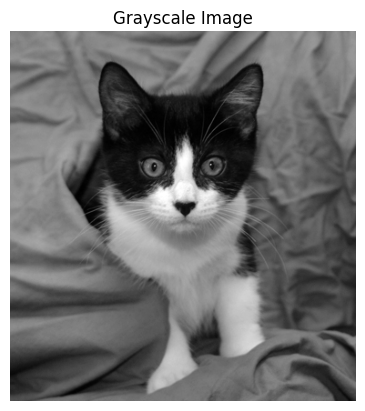

In [8]:
plt.imshow(img2_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

In [9]:
# Task 3: Image smoothing and noise identification
img3_path = '/content/drive/MyDrive/DIP Lab Resources/Assignment/DIP_Lab_task_03.png'
img3 = cv2.imread(img3_path, cv2.IMREAD_GRAYSCALE)


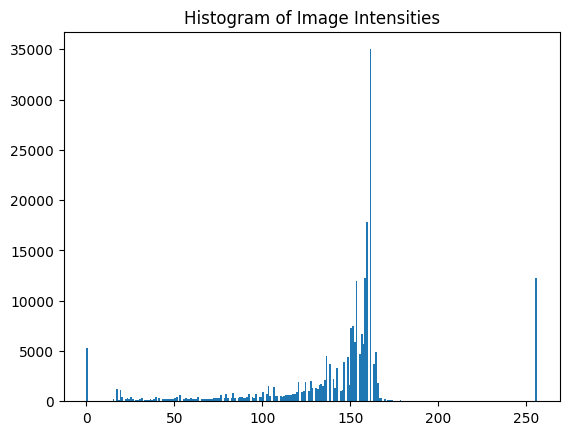

In [10]:
plt.hist(img3.ravel(), bins=256, range=[0, 256])
plt.title('Histogram of Image Intensities')
plt.show()

In [11]:
kernel_size = 5
smoothed_img3 = cv2.medianBlur(img3, kernel_size)

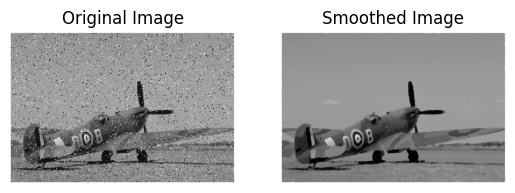

In [12]:
plt.subplot(1, 2, 1)
plt.imshow(img3, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(smoothed_img3, cmap='gray')
plt.title('Smoothed Image')
plt.axis('off')

plt.show()

In [13]:
# Task 4: Reduce brightness of DIP_Lab_task_04.jpg
img4_path = '/content/drive/MyDrive/DIP Lab Resources/Assignment/DIP_Lab_task_04.jpg'
img4 = cv2.imread(img4_path, cv2.IMREAD_COLOR)

In [14]:
brightness_factor = 0.5
reduced_brightness_img4 = np.clip(img4 * brightness_factor, 0, 255).astype(np.uint8)

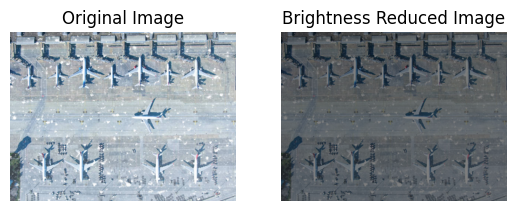

In [15]:
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(reduced_brightness_img4, cv2.COLOR_BGR2RGB))
plt.title('Brightness Reduced Image')
plt.axis('off')

plt.show()

In [16]:
# Task 5: Segmentation problem for DIP_Lab_task_05.jpg
img5_path = '/content/drive/MyDrive/DIP Lab Resources/Assignment/DIP_Lab_task_05.jpg'
img5 = cv2.imread(img5_path, cv2.IMREAD_GRAYSCALE)

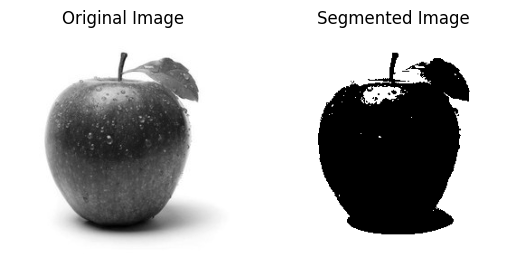

In [17]:
if img5 is not None:
    # Apply K-means clustering
    pixel_values = img5.reshape((-1, 1)).astype(np.float32)
    _, labels, centers = cv2.kmeans(pixel_values, 2, None, (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2), 10, cv2.KMEANS_RANDOM_CENTERS)

    segmented_img5 = centers[labels.flatten()].reshape(img5.shape).astype(np.uint8)

    # Display images
    plt.subplot(1, 2, 1), plt.imshow(img5, cmap='gray'), plt.title('Original Image'), plt.axis('off')
    plt.subplot(1, 2, 2), plt.imshow(segmented_img5, cmap='gray'), plt.title('Segmented Image'), plt.axis('off')
    plt.show()
else:
    print(f"Error: Unable to load image at {img5_path}")